In [ ]:
# linear algebra
import numpy as np

# data manipulations
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import six
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import nan_euclidean_distances

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Repository Projects/Skripsi/Datasets/pima-indian-diabetest-database.csv', 
                 na_values={'Glucose':0, 'BloodPressure':0, 'SkinThickness':0, 'Insulin':0, 'BMI':0})
# na_values untuk menggantikan nilai 0 pada setiap variable menjadi NAN values, 
# karena Glucose, BloodPressure, dsb tidak mungkin bernilai 0

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Handle Missing Data

### Check Persentation of Missing Values Each Variables

In [ ]:
def get_missings(df):
    labels,values = list(),list()
    if df.isna().sum().sum()>0:
        for column in df.columns:
            if df[column].isnull().sum():
                labels.append(column)
                values.append((df[column].isnull().sum() / len(df[column]))*100)
        missings=pd.DataFrame({'Feature':labels,'MissingPercent':values }).sort_values(by='MissingPercent',ascending=False)
        return missings
    else:
        return False

get_missings(df)

,Feature,MissingPercent
3,Insulin,48.697917
2,SkinThickness,29.557292
1,BloodPressure,4.557292
4,BMI,1.432292
0,Glucose,0.651042


### Impute Missing Values | KNN Imputer

In [ ]:
# IMPUTE MISSING VALUE
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

# pisah dulu variable X dan Y
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

# implement knn impute
X_trans = imputer.fit_transform(X)

## Normalization | MinMax Normalization

In [ ]:
# NORMALIZATION
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X_trans)
y_norm = y.to_numpy()

## Balance Data | SMOTE

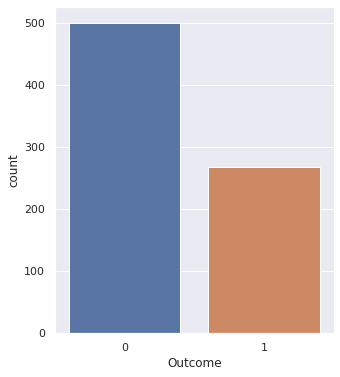

In [ ]:
plt.figure(figsize = (5,6))
sns.set_theme(style="darkgrid")
sns.countplot(x="Outcome", data=df)
plt.savefig("imbalance_data.png", transparent=True)

In [ ]:
class0_num = len(df[df['Outcome'] == 0])
class1_num = len(df[df['Outcome'] == 1])

print('jumlah observasi dengan kelas 0', class0_num)
print('jumlah observasi dengan kelas 1', class1_num)

print('=============================================================')
class0_perc = class0_num / (len(df))
class1_perc = class1_num / (len(df))

print('persentase observasi kelas 0', class0_perc)
print('persentase observasi kelas 1', class1_perc)

jumlah observasi dengan kelas 0 500
jumlah observasi dengan kelas 1 268
persentase observasi kelas 0 0.6510416666666666
persentase observasi kelas 1 0.3489583333333333


In [ ]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.3)

In [ ]:
oversample = SMOTE()
X_trainSmote, y_trainSmote = oversample.fit_resample(X_train, y_train)

In [ ]:
unique, count = np.unique(y_trainSmote, return_counts=True)

y_trainSmoted_value_count = {k:v for (k,v) in zip(unique, count)}
y_trainSmoted_value_count

{0: 349, 1: 349}

## Save Preprocessed Data

In [ ]:
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_test)

np.save('X_trainSmote.npy', X_trainSmote)
np.save('y_trainSmote.npy', y_trainSmote)

np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)